# Word2Vec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for sent in t_list:
    corpus.append(sent.split())

In [ ]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [ ]:

model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)


*   sg = default olarak cbow algoritmasını kullanılır. 

*  sg = 1 yapıldığı durumlarda skip - gram algoritması kullanılarak işlemler yapılmaktadır.
* window sağ ve sola kaç adım ilerleneceği belirlenir.
* size ise oluşturulan kelime vektörünün boyutunu temsil etmektedir.

In [ ]:
#wv : word2vec vektorü numpy array olarak saklanmaktadır.
model.wv['ankara']

array([-0.3709984 , -0.26234862,  0.3007374 ,  0.3227471 ,  0.6444154 ,
       -0.03037872,  0.13019553,  0.36535016, -0.16393213,  0.10539057,
        0.24903616, -0.5234338 ,  0.04797089, -0.03639532,  0.12024665,
        0.34669745,  0.7192245 , -0.06410912, -0.05535605, -0.4862336 ,
        0.02692514,  0.5432097 ,  0.28417054, -0.8433277 , -0.18618427,
        0.00703782, -0.4777311 , -0.09371425, -0.5513457 ,  0.28556302,
        0.12211949,  0.12248042, -0.17216696, -0.1886125 , -0.21026024,
        0.1461452 , -0.25156268, -0.3294068 , -0.1071042 , -0.5972038 ,
        0.5060492 ,  0.07876784,  0.29147744,  0.20961672,  0.21025898,
        0.31093183, -0.35444468, -0.3440229 ,  0.32805467, -0.3311116 ,
        0.14842483, -0.19496512,  0.07602485, -0.24050373, -0.12636742,
       -0.00672386, -0.12749098, -0.35369855,  0.06415182, -0.8075103 ,
        0.10362502,  0.1619328 , -0.02318392,  0.1617266 , -0.21679333,
        0.14746653,  0.0215755 ,  0.53898877, -0.39289913, -0.32

In [ ]:
#most_similar fonksiyonu ile istenilen kelimeye benzer kelimeler ve kelimelerin yakınlığı vektör.
model.wv.most_similar('hollanda')

[('belçika', 0.8090180158615112),
 ('avusturya', 0.8006830215454102),
 ('danimarka', 0.7888813614845276),
 ('almanya', 0.7840046882629395),
 ('kanada', 0.7693256139755249),
 ('ispanya', 0.7556806802749634),
 ('finlandiya', 0.7362500429153442),
 ('fransa', 0.7354651689529419),
 ('letonya', 0.7346019148826599),
 ('italya', 0.7288773059844971)]

## Modelin Kaydedilmesi

In [ ]:

model.save('Word2Vec.model')

## Modelin Yüklenmesi

In [ ]:

model = Word2Vec.load("Word2Vec.model")

## Görselleştirme

In [ ]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    #Tüm vektörlerin matris olarak tutulması için axis parametresi sıfır olmalıdır. 
    #Aksi takdirde vectorler düzleşecektir.
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
    
    #Her çalıştırıldığında aynı rasgeler değere göre çizim yapılması bekleniyor
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


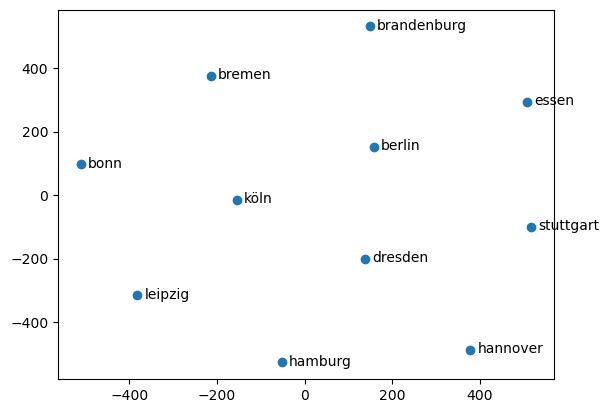

In [ ]:
#Kelimeler arası ilişkiyi görselleştirmek için kullanılır.
closestwords_tsneplot(model, 'berlin')